
# Bank Marketing  Case Study
Presented by: Linh Le, Roy Lin


### 1. Data loading 

    a. 
    Load customer_demographics into a dataframe. 
    Lowercase all column names.
    show the first 5 rows and the list of columns and their types.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

customer_demographics = pd.read_csv('customer_demographics.csv')
customer_demographics.columns = map(str.lower, customer_demographics.columns)

In [94]:
customer_demographics.head()

,education,customer_id,age,marital,job
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


In [95]:
customer_demographics.dtypes

education       object
customer_id      int64
age            float64
marital         object
job             object
dtype: object

    b. 
    Load customer_banking_info into a dataframe. 
    Change the column name customer_id1 to customer_id. 
    Show the first 5 rows and the list of columns and their types.

In [96]:
customer_banking_info = pd.read_csv('customer_banking_info.csv')
customer_banking_info.rename(columns={'customer_id1': 'customer_id'}, inplace=True)

In [97]:
customer_banking_info.head()

,customer_id,default,balance,housing,loan
0,122482,no,347,no,no
1,119725,no,3462,no,no
2,103490,no,157,yes,no
3,126218,no,3689,yes,no
4,104835,no,0,yes,yes


In [98]:
customer_banking_info.dtypes

customer_id     int64
default        object
balance         int64
housing        object
loan           object
dtype: object

### 2. Merging 

    a. Merge the two dataframes into one unified dataframe named bank. 

In [99]:
bank = pd.merge(customer_demographics, customer_banking_info, on='customer_id', how='outer')

    b. Show the first 5 rows of the new dataframe and the column names and their types.     

In [100]:
bank.head()

,education,customer_id,age,marital,job,default,balance,housing,loan
0,secondary,100103,33.0,married,entrepreneur,no,2,yes,yes
1,tertiary,100106,35.0,married,management,no,231,yes,no
2,primary,100118,57.0,married,blue-collar,no,52,yes,no
3,primary,100119,60.0,married,retired,no,60,yes,no
4,secondary,100121,28.0,married,blue-collar,no,723,yes,yes


In [101]:
bank.dtypes

education       object
customer_id      int64
age            float64
marital         object
job             object
default         object
balance          int64
housing         object
loan            object
dtype: object

    c. Save the merged dataframe into a csv file and name it customer_demo_bankinfo.csv. 
    

In [102]:
bank.to_csv('customer_demo_bankinfo.csv', index=False)

### 3. Categorical variables 

#### 3.1. Examine the variable 'marital'.

    a. Lowercase all values under marital column, show the frequency table before and after the change. 

In [103]:
bank['marital'].value_counts()

married     5942
single      3393
divorced    1185
DIVORCED      58
Name: marital, dtype: int64

In [104]:
bank['marital'] = bank['marital'].str.lower()
bank['marital'].value_counts()

married     5942
single      3393
divorced    1243
Name: marital, dtype: int64

     b. Save the frequency table for marital into a dataframe, then create a pie plot for marital.     

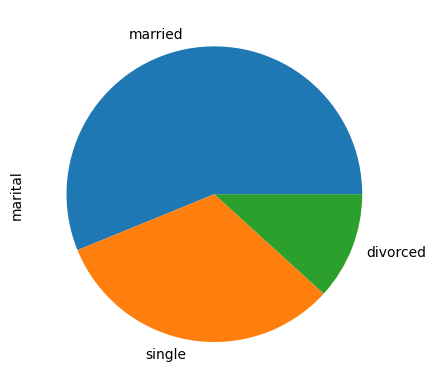

In [105]:
marital_count_df = bank['marital'].value_counts()
marital_count_df.plot.pie(y='marital')
plt.show()

#### 3.2. Examine the variable "Job". 

    Write a code to combine the categories "admin." and "ADMINISTRATION" for the job column as "admin". replace any occurrence of "ADMINISTRATION" or "admin." with "admin". Show the frequency table for the job column before and after the change. 

In [106]:
#before change
bank['job'].value_counts()

management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: job, dtype: int64

In [107]:
#after change
bank['job'].replace({'admin.': 'admin', 'ADMINISTRATION': 'admin'}, inplace=True)
bank['job'].value_counts()

management       2391
blue-collar      1914
technician       1768
admin            1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: job, dtype: int64

### 4. Numerical variables

##### <b>  4.1. Examine the age variable 

    a. Show the basic statistics for the age variable and the skewness value. 

In [108]:
bank['age'].isna().sum()

20

In [109]:
age_cleaned = bank['age'].dropna()
age_cleaned.head()

0    33.0
1    35.0
2    57.0
3    60.0
4    28.0
Name: age, dtype: float64

In [110]:
age_cleaned.describe()

count    10558.000000
mean        41.264160
std         12.148345
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max        146.000000
Name: age, dtype: float64

In [111]:
age_cleaned.skew()

1.0081841061028078

A positive skew -> the age data is skewed to the right, which means it's slightly right-skewed 

Interpretation: There are more younger ages but the distribution has a tail stretching towards older ages

    b. Show the histogram and qq plot for the age variable. Is the age variable skewed? 

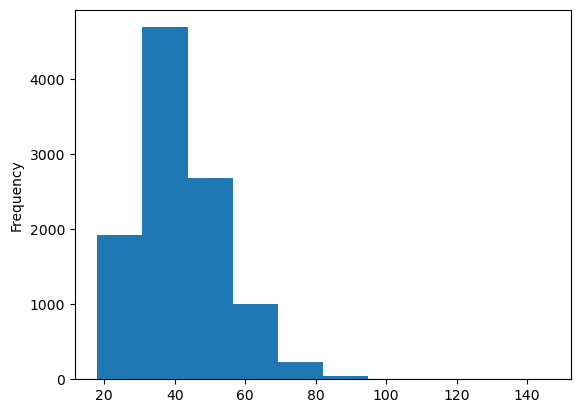

In [112]:
age_cleaned.plot.hist()
plt.show()

Yes, the age variable is right-skewed (positive skew) which means most of the customers in the dataset are in the younger age range and fewer in the older age range
Right skew also means that Mean > Median > Mode

- Mean: 41.2 mean age is inflated because of the outliers
- Median age is 39
- Mode: The peak of the distribution is around 30 to 40, suggesting that the majority of customers are in the younger age groups
- Tail: The distribution has a longer tail extending to the right. This indicates that there are some extreme outliers of individuals older than age 120 
- this could be an error in the dataset as the oldest person that ever existed is 122 years old



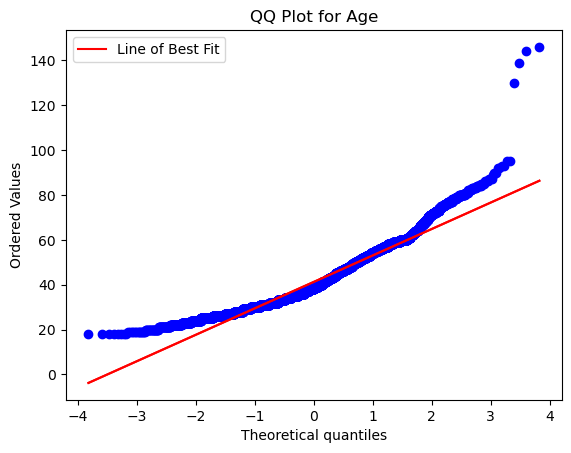

In [113]:
#QQ plot for normal distribution

fig = plt.figure()
res = stats.probplot(age_cleaned, dist="norm", plot=plt)  

# Extract the theoretical quantiles and ordered values
theoretical_quantiles = res[0][0]
ordered_values = res[0][1]

# Plot the line of best fit
slope, intercept = res[1][0], res[1][1]
plt.plot(theoretical_quantiles, slope * theoretical_quantiles + intercept, color='red', label='Line of Best Fit')

# Add labels and legend
plt.title('QQ Plot for Age')
plt.legend()
plt.show()


    c. Perform a log2 transformation for the age variable. show the histogram and qq plot and skewness value. Is the log2 transformation normally distributed?

In [114]:
age_logarithmic = np.log2(age_cleaned) # apply logarithm (base 2) to the cleaned age variable so that it's easier to see the log-normal distribution
age_df = pd.DataFrame({
    'age_cleaned': age_cleaned,
    'age_logarithmic': age_logarithmic
})
age_df

,age_cleaned,age_logarithmic
0,33.0,5.044394
1,35.0,5.129283
2,57.0,5.832890
3,60.0,5.906891
4,28.0,4.807355
...,...,...
10573,73.0,6.189825
10574,25.0,4.643856
10575,51.0,5.672425
10576,71.0,6.149747


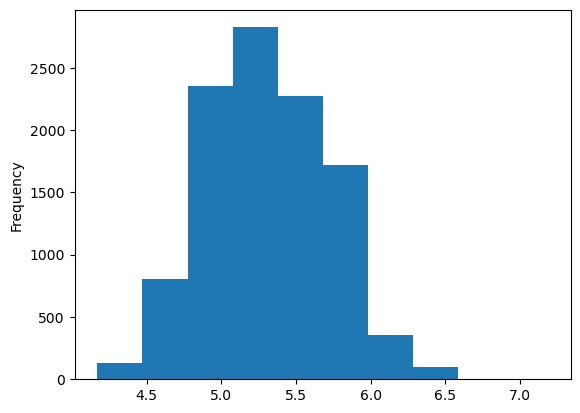

In [115]:
age_logarithmic.plot.hist()
plt.show()

In [116]:
age_logarithmic.skew()

0.2143837341835533

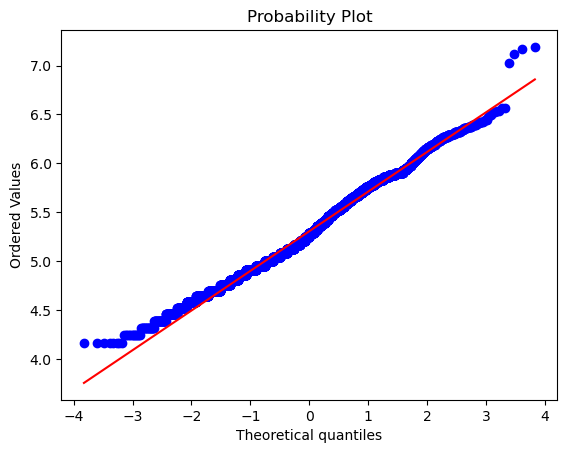

In [117]:
stats.probplot(age_logarithmic, dist="norm", plot=plt)
plt.show()

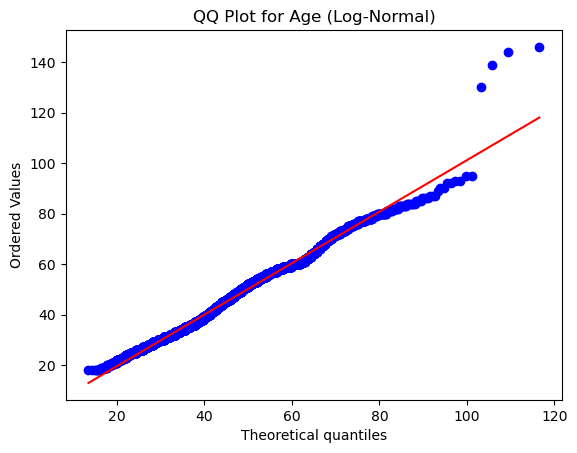

In [118]:
# Estimate the log-normal parameters:
shape, loc, scale = stats.lognorm.fit(age_cleaned, floc=0)  # Fit log-normal distribution

# Create a QQ plot for a log-normal distribution
stats.probplot(age_cleaned, dist="lognorm", sparams=(shape, loc, scale), plot=plt)
plt.title("QQ Plot for Age (Log-Normal)")
plt.show()

In [119]:
outliers = age_cleaned[age_cleaned > 100]
outliers

401     146.0
1151    139.0
1530    144.0
3489    130.0
Name: age, dtype: float64

From the histogram of the log-transformed age, it is roughly symmetric and looks very normal shaped meaning that it appears to follow a normal or normal-like distribution
This is confirmed by the very low skewness value of 0.214, the skewness value indicates a slight positive skew which is caused by the extreme outliers in the data 
But otherwise it very closely follows a normal distribution

Other than 4 outliers (130,139,144 and 146), 
From the QQ plot and line of best fit, it is clear that age very closely follows a log-normal distribution  


##### <b> 4.2. Missing values

    a. Show the number of missing values for each variable in the bank dataframe.

In [120]:
bank.isna().sum() # 20 missing values in age

education       0
customer_id     0
age            20
marital         0
job             0
default         0
balance         0
housing         0
loan            0
dtype: int64

    b. Show the avg age for each job category. 

In [121]:
age_aggregation = bank['age'].groupby(bank['job']) 
age_aggregation.mean()

job
admin            39.246414
blue-collar      39.691099
entrepreneur     42.448276
housemaid        47.547893
management       40.116709
retired          64.896962
self-employed    39.307902
services         38.504717
student          25.920000
technician       39.416431
unemployed       41.116147
unknown          47.123077
Name: age, dtype: float64

    c. Add a new column to the dataframe name 'age_imputed' for replacing the missing values under the age columns with the average age given the job. 

In [122]:
bank['age_imputed'] = bank['age'].fillna(bank['age'].mean())
bank['age_imputed'].head()

0    33.0
1    35.0
2    57.0
3    60.0
4    28.0
Name: age_imputed, dtype: float64

     d. Show rows with age null and all columns including age_imputed. 

In [123]:
bank[bank['age'].isna()]

,education,customer_id,age,marital,job,default,balance,housing,loan,age_imputed
119,tertiary,100898,NaN,married,management,no,305,yes,no,41.26416
592,tertiary,103782,NaN,married,technician,no,94,yes,yes,41.26416
784,primary,104872,NaN,married,blue-collar,no,5,yes,no,41.26416
1383,primary,108581,NaN,married,blue-collar,no,572,yes,yes,41.26416
2129,SECONDARY,112972,NaN,married,technician,no,-241,yes,yes,41.26416
2190,SECONDARY,113317,NaN,divorced,housemaid,no,188,no,no,41.26416
2506,tertiary,114933,NaN,married,blue-collar,no,597,no,no,41.26416
2549,primary,115167,NaN,married,management,no,3760,no,yes,41.26416
2977,SECONDARY,117338,NaN,divorced,services,no,293,yes,yes,41.26416
3989,tertiary,122821,NaN,single,management,no,0,no,no,41.26416


##### <b> 4.3. Outlier detection  </b>

    a. Show the box plot for the balance variable.  

<Axes: >

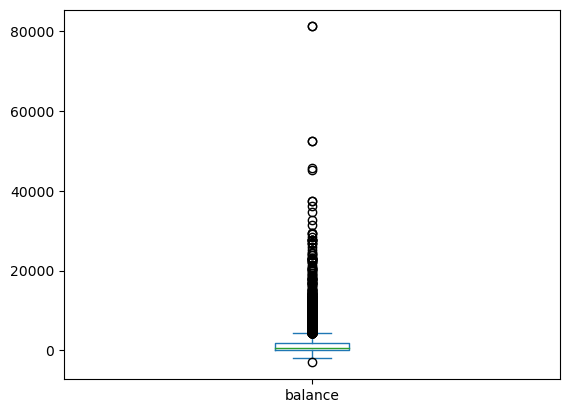

In [124]:
bank['balance'].plot.box()

    b. Show the upper and lower fence for the balance variable. 

In [125]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the Lower and Upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

Lower Fence: -2335.0
Upper Fence: 4225.0


    c. Remove the outliers for the balance variable.

In [126]:
bank_no_outliers  = bank[(bank['balance'] >= lower_fence) & (bank['balance'] <= upper_fence)]

In [127]:
bank.shape

(10578, 10)

In [128]:
bank_no_outliers.shape

(9593, 10)

### 5. Variable correlation study

##### <b> 5.1. Balance and loan. 

    a. Create an equal sized binning for the balance variable. Show the freq table. 

In [129]:
bank['balance_bin'] = pd.qcut(bank['balance'], 8)
bank['balance_bin'].value_counts()

(-3058.001, 0.0]       1433
(984.625, 1765.0]      1324
(125.0, 307.0]         1323
(3431.875, 81204.0]    1323
(307.0, 566.0]         1321
(566.0, 984.625]       1320
(1765.0, 3431.875]     1320
(0.0, 125.0]           1214
Name: balance_bin, dtype: int64

    b. Show the cross table between balance and loan. Perform the chi-2 test.  

In [130]:
pd.crosstab(index = bank['balance_bin'], columns = bank['loan'])

loan,no,yes
balance_bin,,
"(-3058.001, 0.0]",1108,325
"(0.0, 125.0]",1012,202
"(125.0, 307.0]",1130,193
"(307.0, 566.0]",1147,174
"(566.0, 984.625]",1177,143
"(984.625, 1765.0]",1181,143
"(1765.0, 3431.875]",1209,111
"(3431.875, 81204.0]",1246,77


In [131]:
# Create the crosstab
crosstab = pd.crosstab(index=bank['balance_bin'], columns=bank['loan'])

# Add a percentage column for "yes"
crosstab['percentage_yes'] = (crosstab['yes'] / crosstab.sum(axis=1)) * 100

crosstab

loan,no,yes,percentage_yes
balance_bin,,,
"(-3058.001, 0.0]",1108,325,22.679693
"(0.0, 125.0]",1012,202,16.639209
"(125.0, 307.0]",1130,193,14.588057
"(307.0, 566.0]",1147,174,13.171840
"(566.0, 984.625]",1177,143,10.833333
"(984.625, 1765.0]",1181,143,10.800604
"(1765.0, 3431.875]",1209,111,8.409091
"(3431.875, 81204.0]",1246,77,5.820106


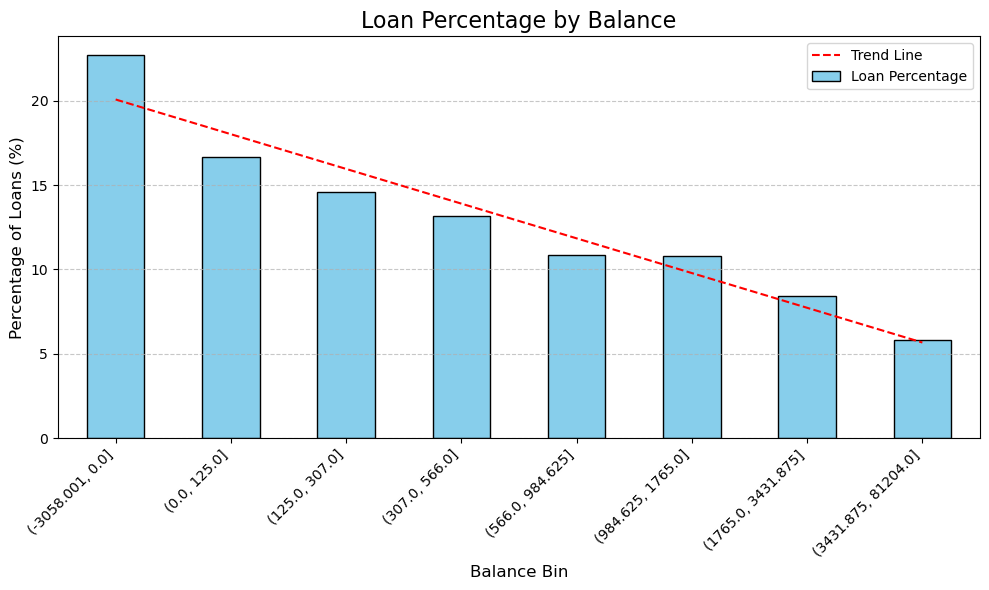

In [132]:
# Create a bar plot for loan percentages
crosstab['percentage_yes'].plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    label='Loan Percentage'
)

# Add a linear trend line
x = np.arange(len(crosstab['percentage_yes']))  # Numeric indices for bins
y = crosstab['percentage_yes']  # Loan percentages
m, b = np.polyfit(x, y, 1)  # Linear regression for the trend line
trend_line = m * x + b
plt.plot(x, trend_line, color='red', linestyle='--', label='Trend Line')

# Build the chart
plt.title('Loan Percentage by Balance', fontsize=16)
plt.xlabel('Balance Bin', fontsize=12)
plt.ylabel('Percentage of Loans (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [133]:
#perform the chi-2 test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(index = bank['balance_bin'], columns = bank['loan']))
print(f"Chi-square {chi2} p-value {p}")
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 232.9451800771048 p-value 1.1746843320905464e-46
Chi-square 232.95 p-value 0.000


In [134]:
average_percentage = crosstab['percentage_yes'].mean()
print("Average Percentage:", average_percentage)

# Calculate the average percentage_yes for negative and positive balances
negative_avg = crosstab.iloc[0]['percentage_yes']  # the first bin is negative
positive_avg = crosstab.iloc[1:]['percentage_yes'].mean()  # Remaining bins are positive

print(f"\nAverage percentage_yes for negative balances: {negative_avg:}%")
print(f"Average percentage_yes for positive balances: {positive_avg:}%")

Average Percentage: 12.867741678800698

Average percentage_yes for negative balances: 22.67969295184927%
Average percentage_yes for positive balances: 11.466034354079474%


    c. Interpret the cross table and the chi-2 value. do people with loan have a positive balance? is there a relationship between the two variables?

The chi-square test has a p-value of 1 e-46 which is way below the commonly accepted thresholds of 0.5 and 0.1
This means that the probability that the null hypothesis is true (i.e. the probability that there is no association between Balance and loans) is basically 0 
which means it is almost guaranteed that there is an association between Balance and Loans 

From the binning created by the crosstab, there is a strong relationship between balance and loan percentage: the higher the balance, the lower the loan percentage
The fact that every consecutive bin has a lower loan percentage than the previous bin shows that there is a strong downward trend
This is also shown more clearly visually in the bar graph with a downward trend line 

Also, we can see that customers with negative balances have the highest loan percentage out of all the groups, 22.68%,  compared to an overall average of 11.46% in the customers with positive balances
This means that customers with negative balances are nearly twice as likely to have a loan than customers with positive balances

##### <b> 5.2. Visual plots 

    a. Subset the bank dataframe for balance between 0 and 2000 into balance2000 dataframe. 

In [135]:
balance2000 = bank[(bank['balance'] >= 0) & (bank['balance'] <= 2000)]

    b. Show colored scatter plot of balance and age from the balance2000 colored based on loan. 

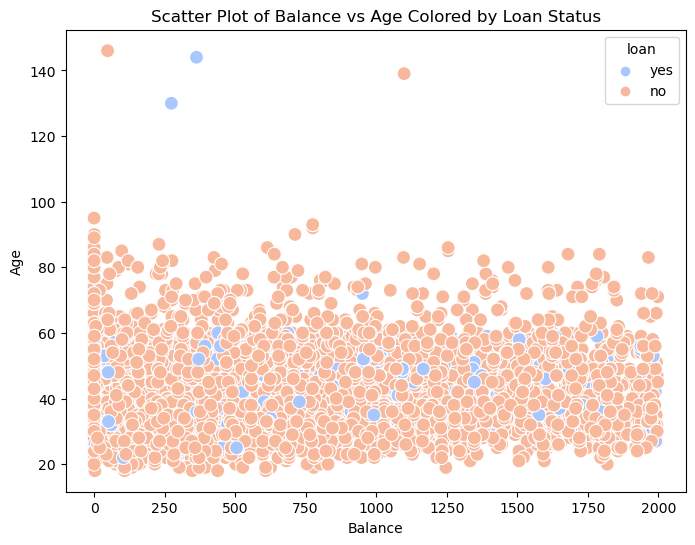

In [136]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=balance2000, x='balance', y='age', hue='loan', palette='coolwarm', s=100)

# Add title and labels
plt.title('Scatter Plot of Balance vs Age Colored by Loan Status')
plt.xlabel('Balance')
plt.ylabel('Age')

# Show plot
plt.show()

    c. Subset the bank dataframe into bank_loanyes and bankloanno then show density plots for both.

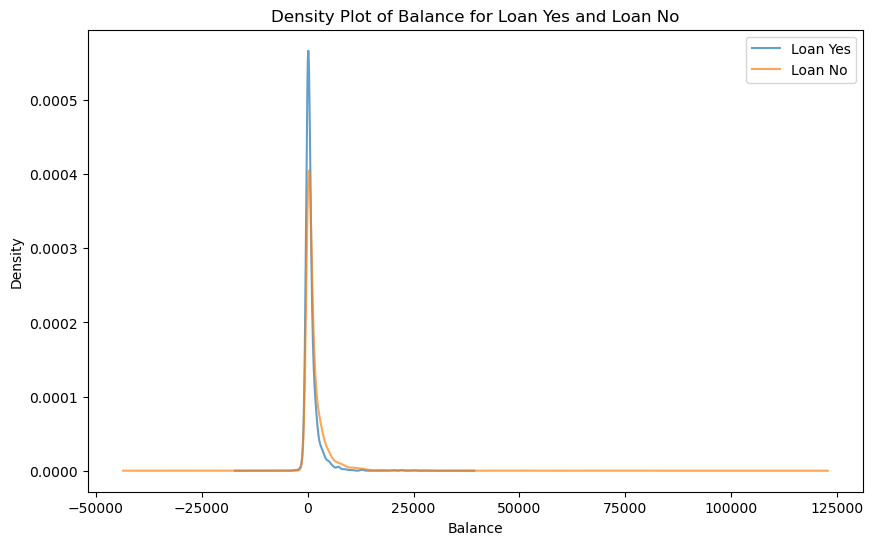

In [137]:
bank_loanyes = bank[bank['loan'] == 'yes']
bank_loanno = bank[bank['loan'] == 'no']

plt.figure(figsize=(10, 6))
bank_loanyes['balance'].plot.density(label='Loan Yes', alpha=0.7)
bank_loanno['balance'].plot.density(label='Loan No', alpha=0.7)
plt.title('Density Plot of Balance for Loan Yes and Loan No')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

### 6. Apply, split-apply-combine

##### 6.1. Add dummy variables 

    a. Lowercase the education column and replace unknown with secondary. 

In [138]:
bank['education'] = bank['education'].str.lower()
bank['education'] = bank['education'].replace(['unknown'], 'secondary')

    b. Add a new column named secondary that takes the value 1 if education value is 'secondary' and 0 otherwise. use apply and lambda to create this new column, show the frequency table for secondary column.

In [139]:
bank['secondary'] = bank['education'].apply(lambda x: 1 if x == 'secondary' else 0)
bank['secondary'].value_counts()

1    5668
0    4910
Name: secondary, dtype: int64

##### 6.2. Apply functions 

    a. Define a function named custom_binning that is defined with x, th1 and th2 and assigns <=th1 if the value x is in less than or equal th1, [th1 th2] if the value x falls in the [th1 th2] bin and >=th2 if the value of x is greater than or equal th2. 

In [140]:
def custom_binning(x, th1, th2):
    """
    Assigns a bin based on thresholds th1 and th2:
    - Returns '<= th1' if x <= th1
    - Returns '[th1, th2]' if th1 < x <= th2
    - Returns '>= th2' if x > th2
    """
    if x <= th1:
        return f"<= {th1}"
    elif th1 < x <= th2:
        return f"[{th1}, {th2}]"
    else:
        return f">= {th2}"

    b. Apply the function on age with th1=30, th2=50. Show the frequency table.

In [141]:
# Apply the function on the 'age' column
bank['age_bin'] = bank['age'].apply(lambda x: custom_binning(x, 30, 50))

# Generate the frequency table for the age bins
age_bin_frequency = bank['age_bin'].value_counts()
age_bin_frequency

[30, 50]    6288
>= 50       2372
<= 30       1918
Name: age_bin, dtype: int64

##### 6.3. Vectorizing functions 
    a. Define a vectorized function with housing, loan and education vectors. The function returns a score that accumulates points based on loan, housing and education.
    The score increments as follows: 
    if housing is yes, the score adds by 1. 
    if loan is no, the score adds by 1. 
    if education is tertiary, the score increments by 1.   

In [142]:
def calculate_risk(housing, loan, education):
    """
    Calculate a risk score based on the following rules:
    - Increment score by 1 if housing is 'yes'.
    - Increment score by 1 if loan is 'no'.
    - Increment score by 1 if education is 'tertiary'.
    """
    score = 0
    if housing == 'yes':
        score += 1
    if loan == 'no':
        score += 1
    if education == 'tertiary':
        score += 1
    return score

# Vectorize the function for application across arrays
vectorized_risk = np.vectorize(calculate_risk)

    b. Call the functions with housing, loan and education from bank dataframe. Add risk column to the dataframe and show the frequency table.

In [143]:
bank['risk'] = vectorized_risk(bank['housing'], bank['loan'], bank['education'])

risk_frequency = bank['risk'].value_counts()

risk_frequency

2    5151
1    3813
3    1193
0     421
Name: risk, dtype: int64

##### 6.4. Aggregation 
    a. Use agg() function after grouping by housing to calculate the median age, the mean balance.  

In [144]:
aggregation_result = bank.groupby('housing').agg(
    median_age=('age', 'median'),
    mean_balance=('balance', 'mean')
)

aggregation_result

,median_age,mean_balance
housing,,
no,41.0,1796.684939
yes,37.0,1273.153769


    b. Use transform() function after grouping by housing to standardize the balance per each group. Save into a new column named: balance_grpZ. Call describe() on the new balance_grpZ column.

In [145]:
bank['balance_grpZ'] = bank.groupby('housing')['balance'].transform(lambda x: (x - x.mean()) / x.std())
bank['balance_grpZ'].describe()

count    1.057800e+04
mean     2.686870e-18
std      9.999527e-01
min     -1.670476e+00
25%     -4.607507e-01
50%     -3.159644e-01
75%      6.859324e-02
max      2.250850e+01
Name: balance_grpZ, dtype: float64